In [1]:
!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [8]:
df = pd.read_csv('uber.csv')

In [9]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.drop(columns=["Unnamed: 0", "key"], inplace=True)

In [11]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
df.shape

(200000, 7)

In [13]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [14]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [17]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

C:\Users\Aishwarya Bhansali\AppData\Local\Temp\ipykernel_3108\3116941781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)
C:\Users\Aishwarya Bhansali\AppData\Local\Temp\ipykernel_3108\3116941781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [18]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [19]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [20]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [21]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [22]:
df = df.assign(hour = df['pickup_datetime'].dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [23]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [24]:
df = df.drop(["pickup_datetime"], axis =1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


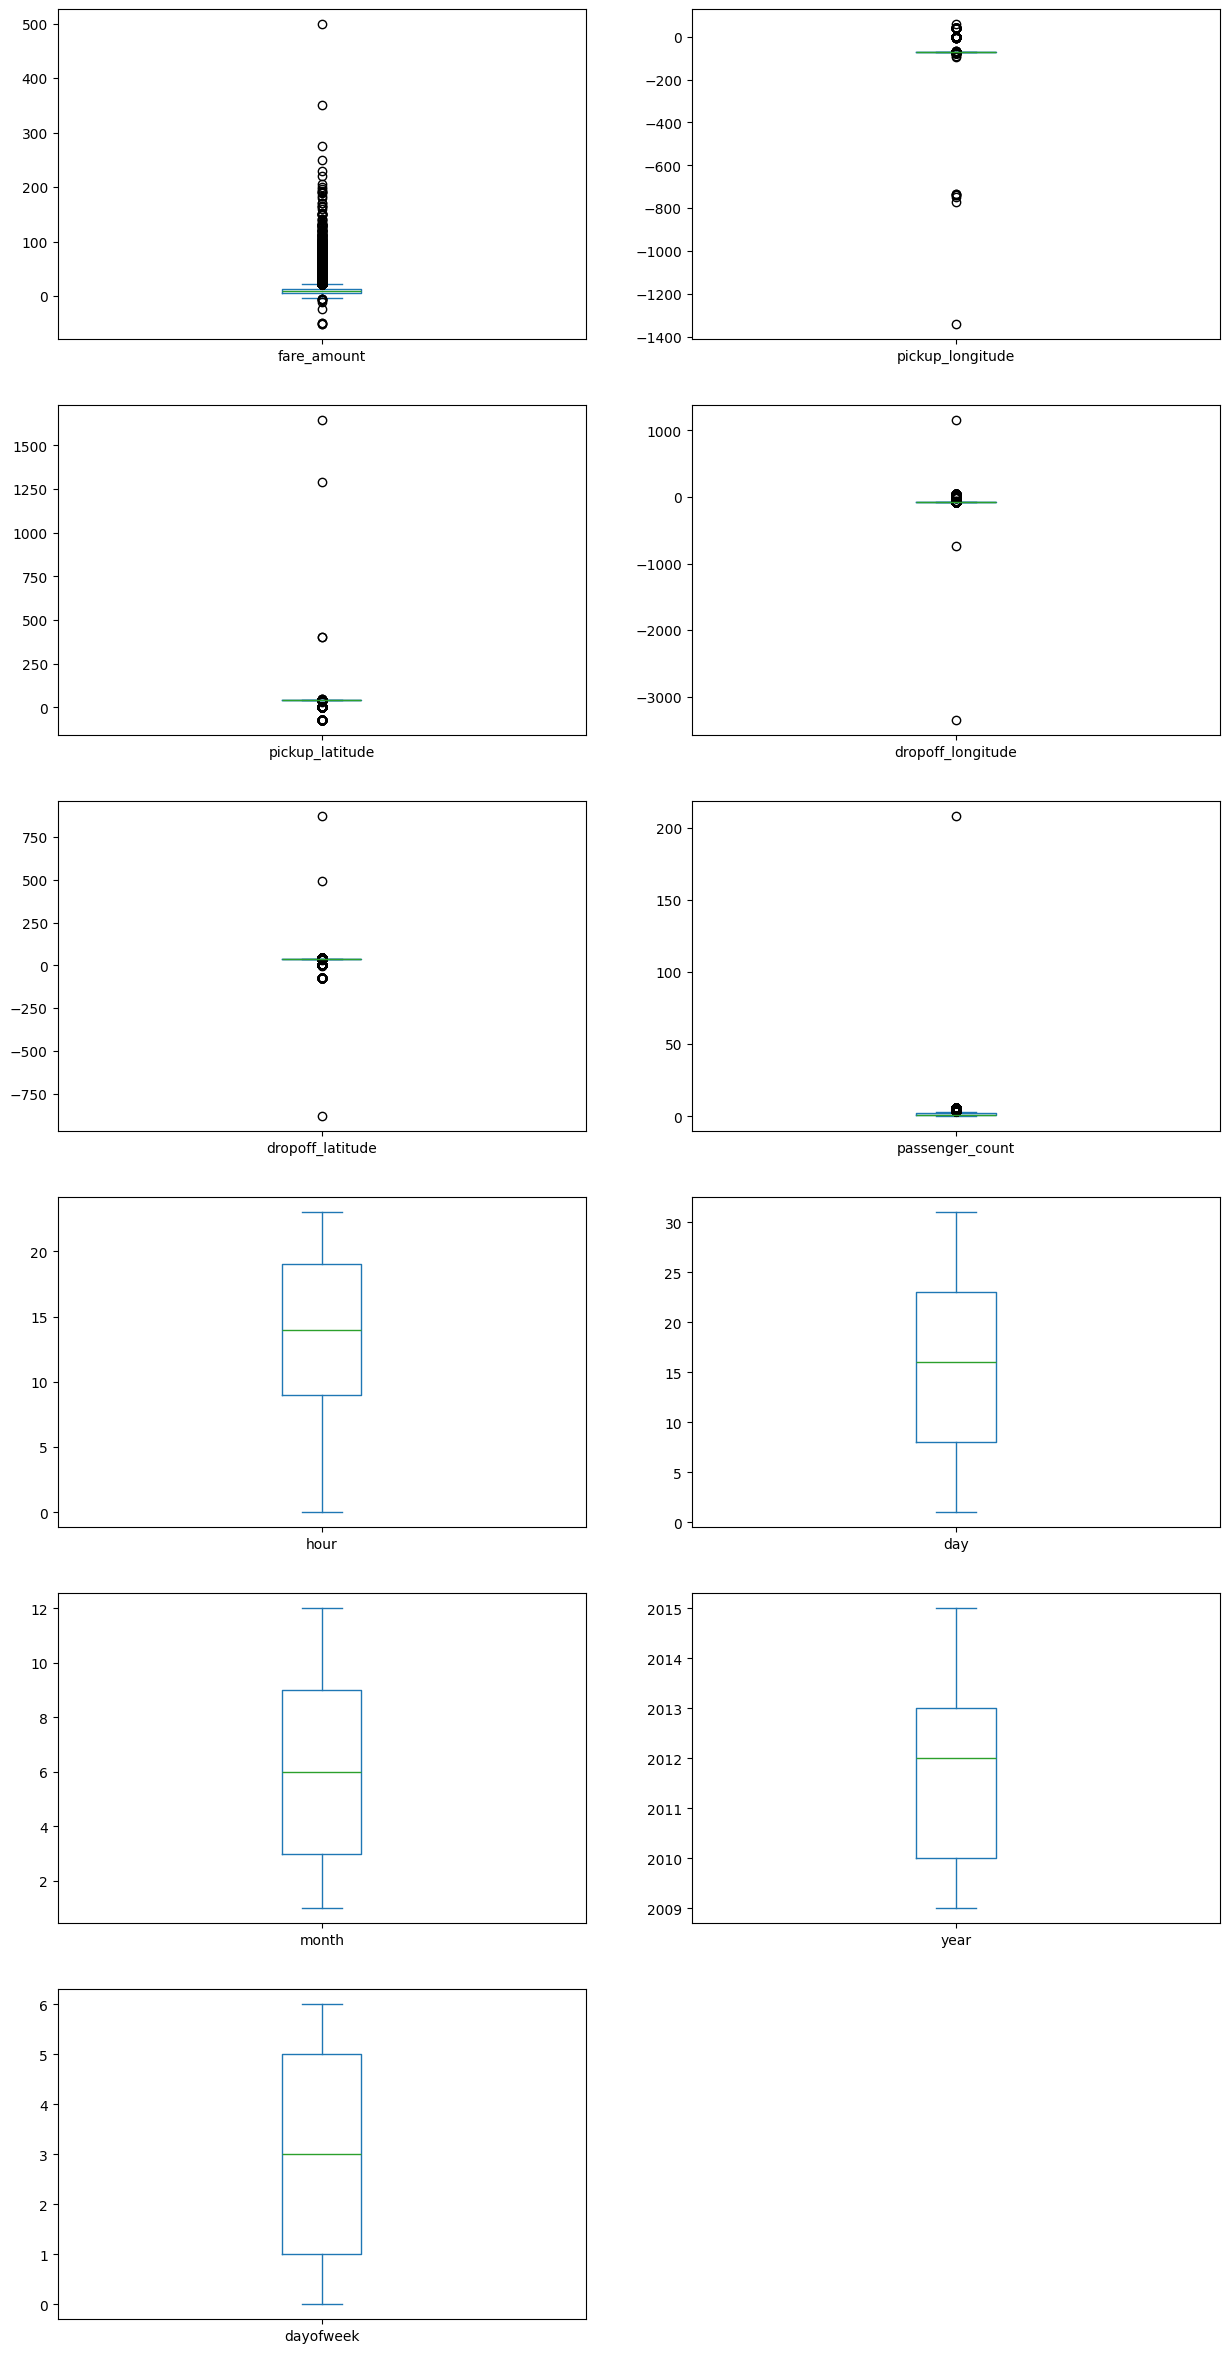

In [26]:
df.plot(kind='box', subplots=True, layout=(6,2), figsize=(15,30))
plt.show()

In [29]:
def detect_outliers(df1, col):
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3 - q1 
    low = q1 - 1.5*iqr
    high = q3 + 1.5 * iqr
    df1[col] = np.clip(df1[col], low, high)
    return df1

def treat_outliers(df1, col_list):
    for c in col_list:
        df1 = detect_outliers(df, c)
    return df1

In [30]:
df = treat_outliers(df, df.iloc[:,:])

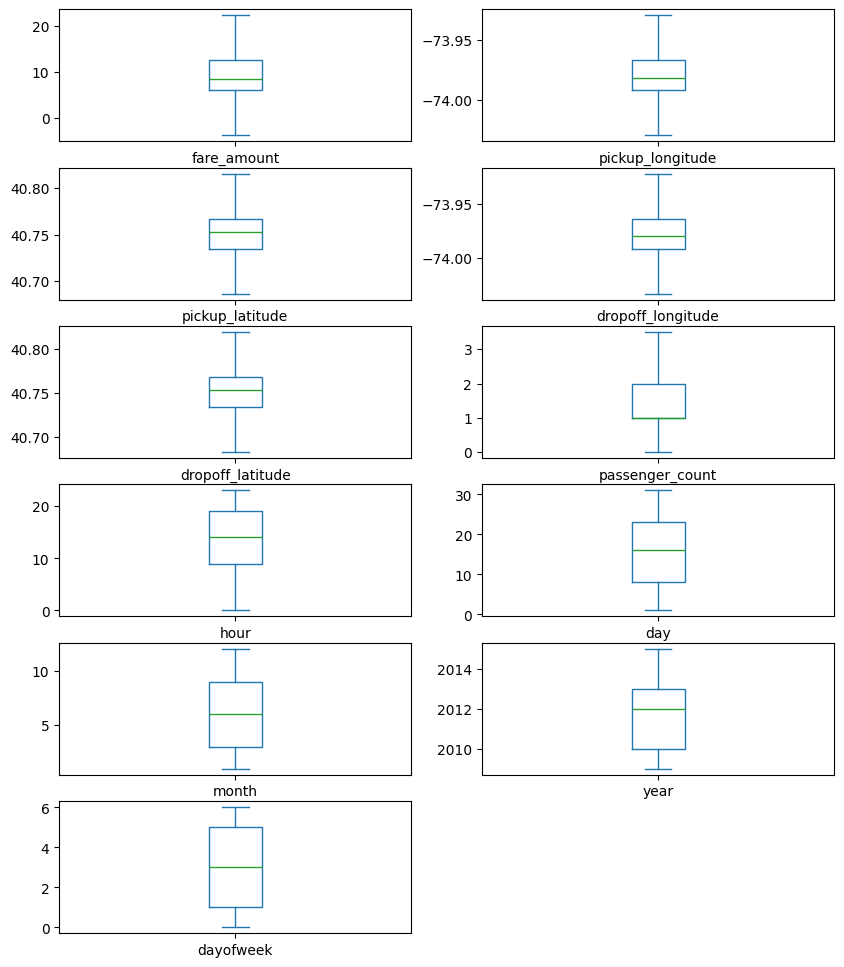

In [31]:
df.plot(kind='box', subplots=True, figsize=(10,12), layout=(6,2))
plt.show()

In [32]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550
hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617
month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786
year,0.141277,0.010198,-0.014243,0.011355,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113


<Axes: >

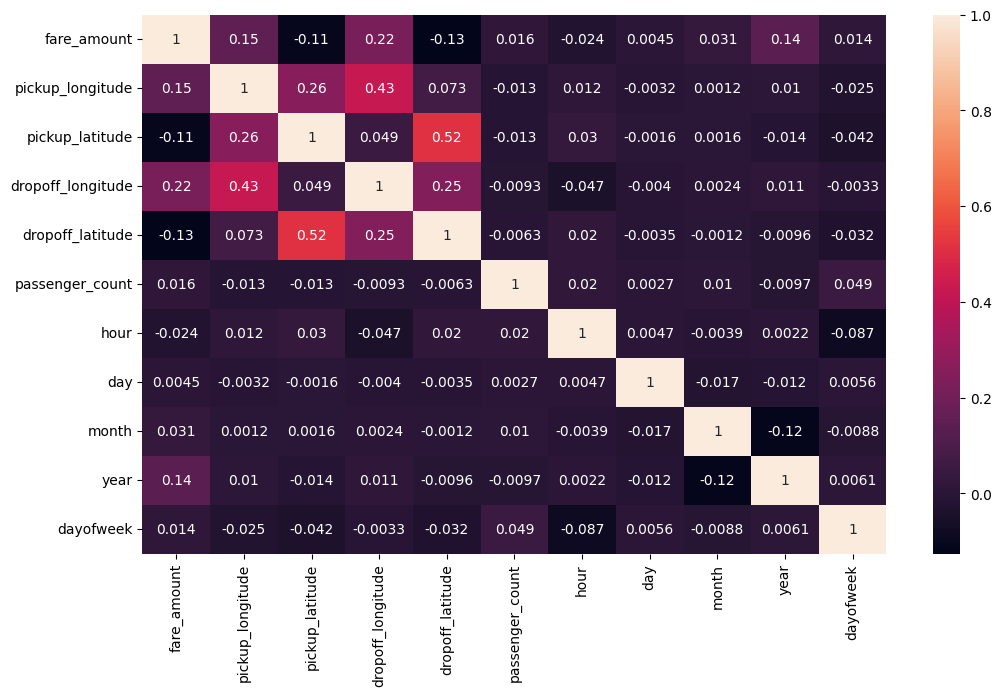

In [34]:
fig, axes = plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)

In [35]:
x = df.drop('fare_amount', axis=1)
y = df['fare_amount']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [40]:
reg = LinearRegression()
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
y_pred = reg.predict(x_test)

In [42]:
y_pred

array([10.76432042,  8.17549437, 10.69959391, ..., 10.68162145,
        9.70206632,  9.28745855], shape=(40000,))